In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfh=pd.read_csv("heart.csv")
dfh.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
dfh.groupby("TenYearCHD").agg({"TenYearCHD":"count"})

,TenYearCHD
TenYearCHD,
0,3594
1,644


In [6]:
categorical=dfh[["male","education","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes"]]
continuous=dfh[["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]

In [7]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

<AxesSubplot:>

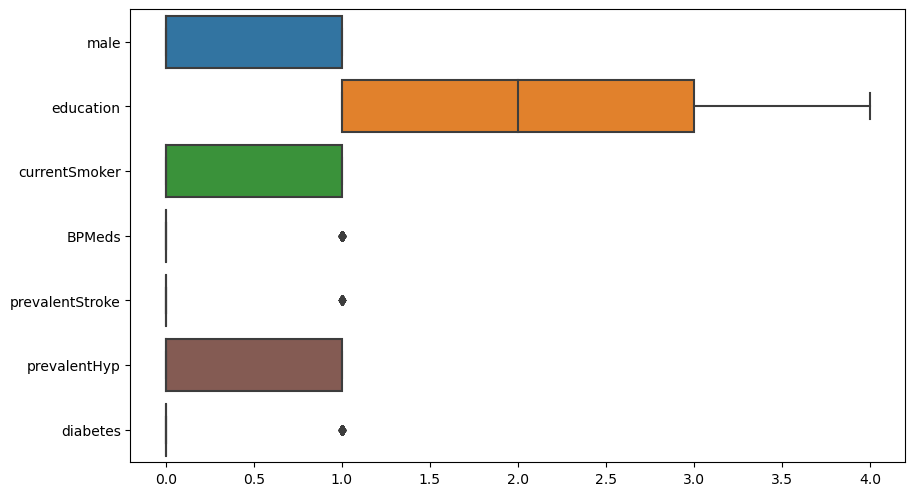

In [8]:
plt.figure(figsize=(10,6),dpi=100)
sns.boxplot(data=categorical,orient='h')

<AxesSubplot:>

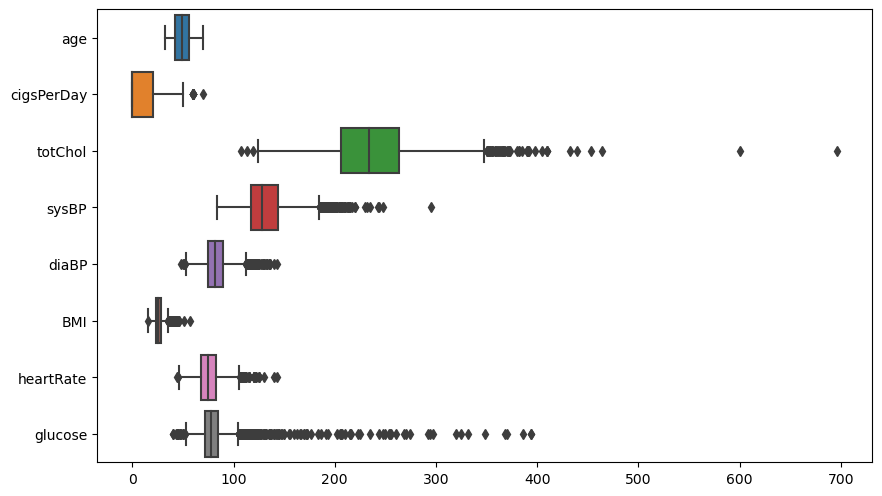

In [9]:
plt.figure(figsize=(10,6),dpi=100)
sns.boxplot(data=continuous,orient='h')

In [10]:
quantile1,quantile3=np.percentile(continuous["heartRate"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

105.5 45.5


In [11]:
for i in range(0,len(continuous["heartRate"])):
    if continuous.loc[i,"heartRate"]>upperbound:
               continuous.loc[i,"heartRate"]=upperbound
    elif continuous.loc[i,"heartRate"]<lowerbound:
               continuous.loc[i,"heartRate"]=lowerbound

In [12]:
quantile1,quantile3=np.percentile(continuous["cigsPerDay"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

50.0 -30.0


In [13]:
for i in range(0,len(continuous["cigsPerDay"])):
    if continuous.loc[i,"cigsPerDay"]>upperbound:
               continuous.loc[i,"cigsPerDay"]=upperbound
    elif continuous.loc[i,"cigsPerDay"]<lowerbound:
               continuous.loc[i,"cigsPerDay"]=lowerbound

In [14]:
quantile1,quantile3=np.percentile(continuous["totChol"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

348.5 120.5


In [15]:
for i in range(0,len(continuous["totChol"])):
    if continuous.loc[i,"totChol"]>upperbound:
               continuous.loc[i,"totChol"]=upperbound
    elif continuous.loc[i,"totChol"]<lowerbound:
               continuous.loc[i,"totChol"]=lowerbound

In [16]:
quantile1,quantile3=np.percentile(continuous["sysBP"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

184.5 76.5


In [17]:
for i in range(0,len(continuous["sysBP"])):
    if continuous.loc[i,"sysBP"]>upperbound:
               continuous.loc[i,"sysBP"]=upperbound
    elif continuous.loc[i,"sysBP"]<lowerbound:
               continuous.loc[i,"sysBP"]=lowerbound

In [18]:
quantile1,quantile3=np.percentile(continuous["diaBP"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

112.1875 52.6875


In [19]:
for i in range(0,len(continuous["diaBP"])):
    if continuous.loc[i,"diaBP"]>upperbound:
               continuous.loc[i,"diaBP"]=upperbound
    elif continuous.loc[i,"diaBP"]<lowerbound:
               continuous.loc[i,"diaBP"]=lowerbound

In [20]:
quantile1,quantile3=np.percentile(continuous["BMI"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

35.480000000000004 15.639999999999997


In [21]:
for i in range(0,len(continuous["BMI"])):
    if continuous.loc[i,"BMI"]>upperbound:
               continuous.loc[i,"BMI"]=upperbound
    elif continuous.loc[i,"BMI"]<lowerbound:
               continuous.loc[i,"BMI"]=lowerbound

In [22]:
quantile1,quantile3=np.percentile(continuous["glucose"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

104.5 52.5


In [23]:
for i in range(0,len(continuous["glucose"])):
    if continuous.loc[i,"glucose"]>upperbound:
               continuous.loc[i,"glucose"]=upperbound
    elif continuous.loc[i,"glucose"]<lowerbound:
               continuous.loc[i,"glucose"]=lowerbound

<AxesSubplot:>

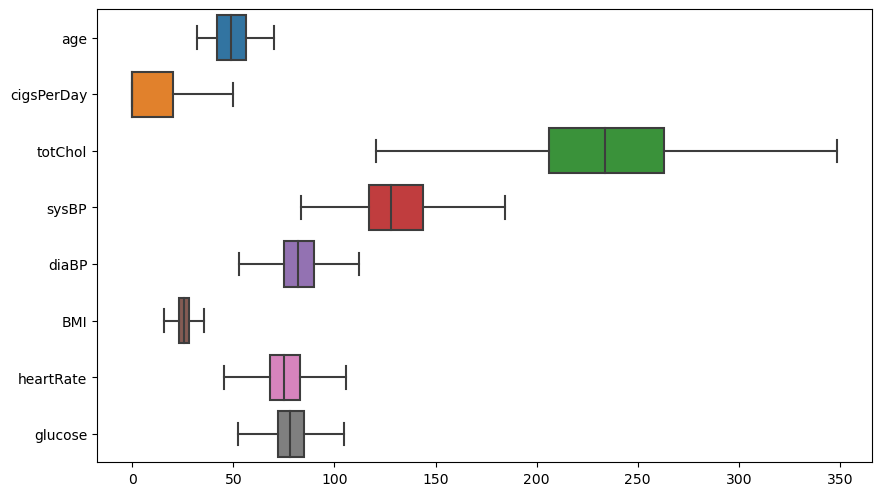

In [24]:
plt.figure(figsize=(10,6),dpi=100)
sns.boxplot(data=continuous,orient='h')

In [25]:
l1=[]
for i in range(0,len(categorical.columns)):
    pred=categorical.columns[i]
   
    p=pd.crosstab(index=dfh["TenYearCHD"],columns=dfh[pred])
    ch=chi2_contingency(p)
    
    if (ch[1]<0.05):
        l1.append(categorical.columns[i])
        
print(l1)    

['male', 'education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


In [26]:
l2=[]
for i in range(0,len(continuous.columns)):
    pred=continuous.columns[i]
   
    q=dfh.groupby("TenYearCHD")[pred].apply(list)
    an=f_oneway(*q)
    
    if (an[1]<0.05):
        l2.append(continuous.columns[i])
        
print(l2)

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']


In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)

In [28]:
x=dfh[l1+l2]
y=dfh["TenYearCHD"]

In [29]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=0,sampling_strategy=0.8)
x_res,y_res=os.fit_resample(x,y)

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=16)

In [31]:
y_test.value_counts()

0    697
1    597
Name: TenYearCHD, dtype: int64

<AxesSubplot:>

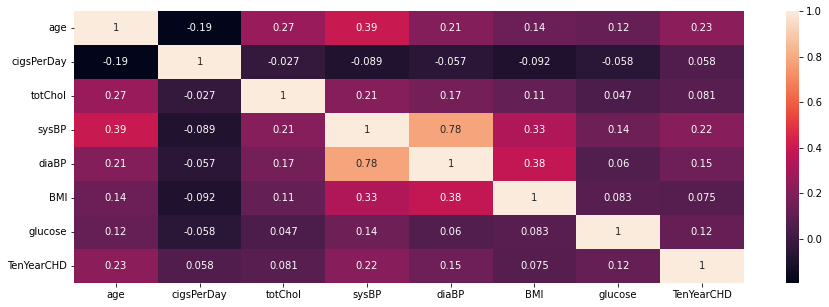

In [32]:
plt.figure(figsize=(15,5))
sns.heatmap(dfh[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose',"TenYearCHD"]].corr(),annot=True)

<AxesSubplot:>

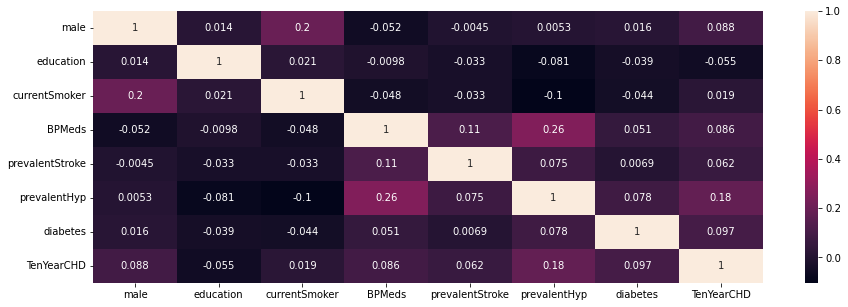

In [33]:
plt.figure(figsize=(15,5))
sns.heatmap(dfh[["male","education","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes","TenYearCHD"]].corr(),annot=True)

In [34]:
clf=RandomForestClassifier(n_estimators=1000,random_state=0)

In [35]:
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [36]:
ans=pd.DataFrame(clf.predict(x_test))
round(len(ans[ans[0]==y_test.values])/len(ans)*100,0)

97.0

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       697
           1       0.95      0.98      0.97       597

    accuracy                           0.97      1294
   macro avg       0.97      0.97      0.97      1294
weighted avg       0.97      0.97      0.97      1294



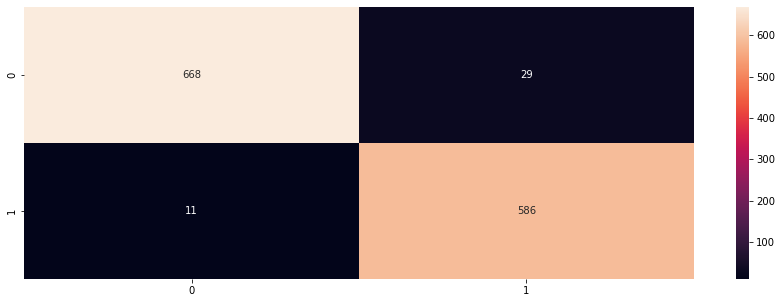

In [37]:
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test.values,ans),annot=True,fmt='d')
print(classification_report(y_test.values,ans))

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV


In [39]:
logreg=LogisticRegression(random_state=0,max_iter=10000000000000000000,fit_intercept=True)
rfe=RFECV(logreg,step=1,scoring="neg_mean_squared_error")

In [40]:
rfe.fit(x_train,y_train.values.ravel())

RFECV(estimator=LogisticRegression(max_iter=10000000000000000000,
                                   random_state=0),
      scoring='neg_mean_squared_error')

In [41]:
x_train.columns[rfe.support_]

Index(['male', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'age',
       'cigsPerDay', 'sysBP', 'BMI', 'glucose'],
      dtype='object')

In [42]:
ans1=pd.DataFrame(rfe.predict(x_test))
round(len(ans1[ans1[0]==y_test.values])/len(ans1)*100,0)

68.0

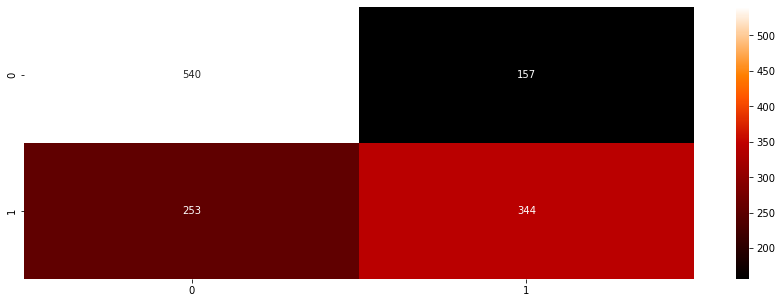

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       697
           1       0.69      0.58      0.63       597

    accuracy                           0.68      1294
   macro avg       0.68      0.68      0.68      1294
weighted avg       0.68      0.68      0.68      1294



In [43]:
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test.values,ans1),annot=True,cmap="gist_heat",fmt='d')
plt.show()
print(classification_report(y_test.values,ans1))

In [44]:
from sklearn.metrics import recall_score,precision_score

In [45]:
recall_score(y_test.values,ans)

0.981574539363484

In [46]:
precision_score(y_test.values,ans)

0.9528455284552846

In [47]:
precision_score(y_test.values,ans1)

0.6866267465069861

In [48]:
recall_score(y_test.values,ans1)

0.576214405360134